In [ ]:
from pathlib import Path
import json
import itertools
import pandas as pd

In [ ]:
tdd_anomalycorr = "/Users/christine/Projects/2023_Riverice/data/breakupdata/derived/TDD_anomaly_correlations.csv"
breakup_stats = "/Users/christine/Projects/2023_Riverice/data/breakupdata/derived/breakupdate_mean_std_1983_2022.csv"
stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
outfolder = Path("/Users/christine/Projects/2023_Riverice/data/breakupdata/derived/")

Rename station names

In [ ]:
anomalycorrDF = pd.read_csv(tdd_anomalycorr, header=3, index_col=0)
anomalycorrDF

,date,stationname,location,r2,r,p,DateStamp
0,04-01,ALYESKA,Koyukuk River at Bettles,0.000269,0.016411,0.922096,2000-04-01
1,04-01,ANCHORAGE_MERRILL_FIELD,Koyukuk River at Bettles,0.000444,-0.021081,0.920329,2000-04-01
2,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Koyukuk River at Bettles,0.004498,0.067068,0.676945,2000-04-01
3,04-01,AUKE_BAY,Koyukuk River at Bettles,0.016624,0.128936,0.427824,2000-04-01
4,04-01,BARROW_AP,Koyukuk River at Bettles,0.000000,0.000000,0.000000,2000-04-01
...,...,...,...,...,...,...,...
98600,06-04,SITKA_AP,Gakona River at Gakona,0.144046,-0.379534,0.026840,2000-06-04
98601,06-04,SKAGWAY_AP,Gakona River at Gakona,0.098393,-0.313677,0.118650,2000-06-04
98602,06-04,TALKEETNA_AP,Gakona River at Gakona,0.333423,-0.577428,0.000349,2000-06-04
98603,06-04,TANANA_AP,Gakona River at Gakona,0.040125,-0.200311,0.263692,2000-06-04


### Prototyping: Eagle

In [ ]:
eagleDF = anomalycorrDF[anomalycorrDF.location == 'Yukon River at Eagle']
eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')
eagleDF

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_17460/2464246974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')


,date,stationname,location,r2,r,p,DateStamp
1147,04-01,ALYESKA,Yukon River at Eagle,0.060588,-0.246146,1.309109e-01,2000-04-01
1148,04-01,ANCHORAGE_MERRILL_FIELD,Yukon River at Eagle,0.094858,-0.307990,1.341859e-01,2000-04-01
1149,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Yukon River at Eagle,0.022928,-0.151418,3.324146e-01,2000-04-01
1150,04-01,AUKE_BAY,Yukon River at Eagle,0.013091,-0.114415,4.706087e-01,2000-04-01
1151,04-01,BARROW_AP,Yukon River at Eagle,0.000000,0.000000,0.000000e+00,2000-04-01
...,...,...,...,...,...,...,...
98267,06-04,SITKA_AP,Yukon River at Eagle,0.311553,-0.558170,1.005521e-04,2000-06-04
98268,06-04,SKAGWAY_AP,Yukon River at Eagle,0.305020,-0.552287,8.608987e-04,2000-06-04
98269,06-04,TALKEETNA_AP,Yukon River at Eagle,0.440213,-0.663486,1.240178e-06,2000-06-04
98270,06-04,TANANA_AP,Yukon River at Eagle,0.525176,-0.724690,5.751470e-08,2000-06-04


In [ ]:
grouped = eagleDF.drop(
        columns=['date', 'location', 'r', 'p']).groupby(
                ['stationname', pd.Grouper(key='DateStamp', freq='15D')]).mean().reset_index()

In [ ]:
max4 = (
    grouped
        .groupby(['DateStamp'])
        .apply(lambda group: group.nlargest(4, columns='r2'))
).reset_index(drop=True)

In [ ]:
datestamps = ['2000-04-01', '2000-04-16',
       '2000-05-01', '2000-05-16']

In [ ]:
sites = set()
maxN = 10
for datestamp in datestamps:
    for station in max4[max4.DateStamp== datestamp].stationname.to_list():
        if station == 'COLLEGE_OBSERVATORY':
            continue
        if station not in sites:
            break
    print(station)
    sites.add(station)
    if len(sites) == maxN:
        break 

FAIRBANKS_INTL_AP
EAGLE
BIG_DELTA_AP
NENANA_MUN_AP


In [ ]:
sites

{'BIG_DELTA_AP', 'EAGLE', 'FAIRBANKS_INTL_AP', 'NENANA_MUN_AP'}

In [ ]:
def restore_stationnames(stationlst):
    return [
        item.replace('AP', 'AIRPORT')           # .replace('INTL', 'INTERNATIONAL')
        for item in stationlst
        ]

sites1 = ['COLLEGE_OBSERVATORY', 'EAGLE', 'FAIRBANKS_INTL_AP', 'NENANA_MUN_AP']
# sites1 = restore_stationnames(sites1)
sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP']
# sites2 = restore_stationnames(sites2)
sites1, sites2

(['COLLEGE_OBSERVATORY', 'EAGLE', 'FAIRBANKS_INTL_AP', 'NENANA_MUN_AP'],
 ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP'])

In [ ]:
stationsdfs1 = {}
stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
for station in sites1:
    stationsdfs1[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)

In [ ]:
# sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP']
stationsdfs = {}
stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
for station in sites2:
    stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs['FAIRBANKS_INTL_AP']

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1365.5,1459.0,1177.0,1551.0,1319.5,1133.5,1337.5,1489.5,1645.0,1399.5,...,1283.5,1475.0,1625.5,1713.5,1476.5,1313.5,1714.5,1482.0,1572.0,1395.0
118,1396.5,1477.5,1215.0,1589.0,1349.0,1162.0,1372.5,1519.5,1674.0,1427.0,...,1326.0,1497.0,1649.5,1741.0,1511.0,1345.5,1747.5,1510.0,1603.0,1429.5
119,1421.5,1496.5,1253.0,1624.0,1381.0,1191.5,1411.5,1551.5,1706.5,1456.0,...,1366.5,1524.5,1677.0,1772.5,1545.5,1375.0,1787.0,1537.5,1632.5,1462.5


In [ ]:
mean_eagle = pd.concat(stationsdfs.values())
mean_eagle = mean_eagle.groupby(mean_eagle.index).mean()
mean_eagle

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000000
1,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000000
2,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,2.833333,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000000
3,0.000000,0.000000,0.00,0.000000,0.250,0.000000,0.000000,0.000000,2.833333,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000000
4,0.000000,0.000000,0.00,0.000000,0.250,0.000000,0.000000,0.000000,2.833333,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1402.333333,1400.500000,1101.50,1326.166667,1208.250,1004.833333,1130.333333,1266.636667,1433.666667,1313.336667,...,1177.720,1321.625,1567.125,1562.625,1375.750,1240.9225,1617.125,1411.525,1419.570,1316.376667
118,1433.666667,1422.166667,1140.50,1362.666667,1236.875,1030.000000,1160.666667,1292.970000,1460.833333,1340.503333,...,1217.220,1342.500,1592.750,1592.750,1405.500,1269.5475,1648.500,1437.900,1451.445,1350.543333
119,1463.833333,1440.666667,1178.25,1396.666667,1265.625,1054.500000,1195.000000,1323.970000,1488.666667,1369.003333,...,1255.470,1369.125,1618.125,1622.500,1437.250,1297.7975,1685.125,1463.900,1480.320,1382.876667


<AxesSubplot: xlabel='d_since_march1'>

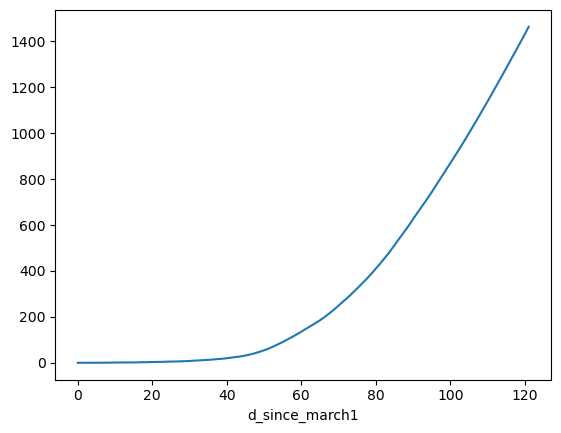

In [ ]:
mean_eagle.mean(axis=1).plot()

<AxesSubplot: xlabel='d_since_march1'>

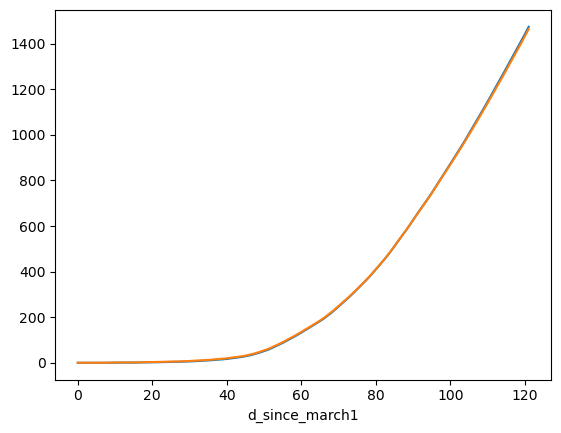

In [ ]:
mean_eagle1 = pd.concat(stationsdfs1.values())
mean_eagle1 = mean_eagle1.groupby(mean_eagle1.index).mean()
ax = mean_eagle1.mean(axis=1).plot()
mean_eagle.mean(axis=1).plot(ax=ax)

<AxesSubplot: xlabel='d_since_march1'>

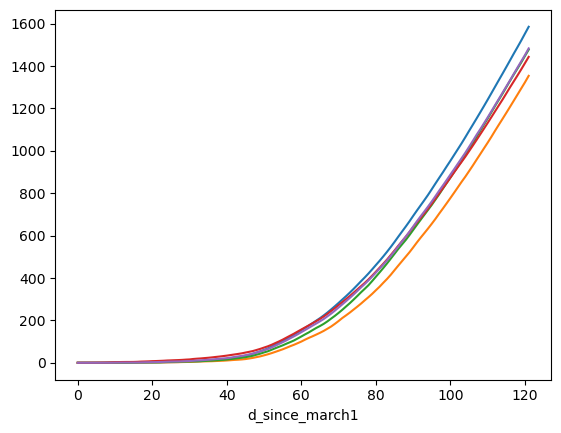

In [ ]:
ax = stationsdfs['FAIRBANKS_INTL_AIRPORT'].mean(axis=1).plot()
stationsdfs['EAGLE'].mean(axis=1).plot(ax=ax)
stationsdfs['NENANA_MUN_AIRPORT'].mean(axis=1).plot(ax=ax)
stationsdfs['BIG_DELTA_AIRPORT'].mean(axis=1).plot(ax=ax)

stationsdfs1['COLLEGE_OBSERVATORY'].mean(axis=1).plot(ax=ax)
